<h1> Linear regression <h1>

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.regressionplots import plot_ceres_residuals

In [2]:
# load data from csv to pandas dataframe; drop useless index column
df = pd.read_csv("data/advertising.csv").drop(["Unnamed: 0"], axis=1)

In [3]:
# data = sales as function of advertising budget for different media (TV, radio, newspaper)

# investigate data
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [4]:
# investigate data
df.describe()

TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

**Task: optimal budget in different medias to boost sales in next year**

A few important questions that we might seek to address:
1. Is there a relationship between advertising budget and sales?
2. How strong is the relationship between advertising budget and sales?
3. Which media contribute to sales?
4. How accurately can we estimate the effect of each medium on sales?
5. How accurately can we predict future sales?
6. Is the relationship linear?
7. Is there synergy (interaction) among advertising media?

<h3> 1. Simple linear regression </h3>

<center>
    Linear model:
$\qquad$ Y $\approx \beta_{0}+\beta_{1}X \qquad$ sales $\approx \beta_{0}+\beta_{1}\times$ TV
</center>

<br>

<center>
data $\rightarrow$ coefficients $\beta_{0}$, $\beta_{1}$ (as close as possibe to the data)
</center>

<br>

<center>
residual sum of squares = RSS = $e^{2}_{1} + e^{2}_{2} + ... + e^{2}_{n}$
<br>
$e_{i} = y_{i} - \hat{y}_{i}$ = i-th observation - i-th prediction
<br>
$\hat{y}_{i}=\hat{\beta}_{0}+\hat{\beta}_{1}X$    
</center>

<br>

<center>
$\downarrow$
</center>

<br>

<center>
analytical expression for $\hat{\beta}_{0}$, $\hat{\beta}_{1}$ calculable from data values
</center>

In [5]:
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b, xlabel, ylabel): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color="b", marker="o", s=15) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color="r") 
  
    # putting labels on
    plt.xlabel(xlabel) 
    plt.ylabel(ylabel) 
  
    # method to show plot 
    plt.show() 

Estimated coefficients:
b_0 = 7.032593549127699 b_1 = 0.04753664043301972


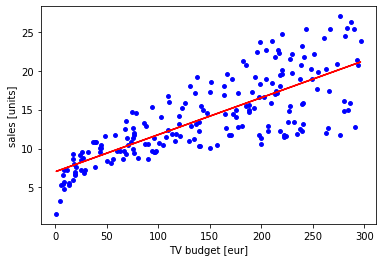

In [6]:
# estimating coefficients 
b = estimate_coef(df["TV"], df["sales"]) 
print("Estimated coefficients:\nb_0 = {} b_1 = {}".format(b[0], b[1])) 

# plotting regression line 
plot_regression_line(df["TV"], df["sales"], b, "TV budget [eur]", "sales [units]") 

- according to this approximation, an additional 1000 eur spent on TV advertising is associated with selling 47.5 additional units of the product

<h3> 2. Accuracy of the coefficient estimates </h3>

Population regression line (true relationship between $X$ and $Y$):
$Y = \beta_{0} + \beta_{1}X + \epsilon$<br>
$\epsilon$ - everything we missed with linear model - the true model is probaly not linear, there maybe other variables that cause variation in $Y$, measurement error, etc. We typically assume that $\epsilon$ is independent of $X$.<br>
<br>

<img src="images/regress_lines.PNG"> </img>

Red line: true relationship $f(X)=2+3X$ <br>
Dark blue line: least squre line for plotted points generated from the model $f(X)=2+3X+\epsilon$<br>
Light blue lines: 10 random data sets generated from the model $f(X)=2+3X+\epsilon$<br><br>
Image credit: An Introduction to Statistical Learning - James et al. (2013) <br>

---

**It is standard statistical approach to use information from a sample to estimate charecteristics of a large population.** <br>
Example: sample mean $\approx$ population mean; we expect that if we average huge number of sample means we get the population mean.<br>
In analogy, similar is true for regression coefficients $\beta_{0}$ and $\beta_{1}$.
<br><br>

<center>
Continuing with this analogy: standard error of (sample) mean SE$(\mu)$, SE$^{2}(\mu)$ = Var$(\mu)$ = $\sigma^{2}/n$, $\sigma$ - standard deviation of each of the realizations $y_{i}$ of $Y$
</center>    

<center>
$\downarrow$
</center>    

<center>
we can define standard error formulas: SE$(\hat{\beta}_{0})$, SE$(\hat{\beta}_{1})$
</center>    

<center>
$\downarrow$
</center>

<center>
confidence intervals<br>
e.g. 95% confidence interval for $\hat{\beta}_{1}$: $\qquad$ $[\hat{\beta}_{1}-2$SE$(\hat{\beta}_{1})$, $\hat{\beta}_{1}+2$SE$(\hat{\beta}_{1})]$
</center>

---

**Statsmodels library**

https://www.statsmodels.org/dev/index.html

https://www.statsmodels.org/dev/regression.html

https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html

In [7]:
# create Ordinary Least Square model
model = ols("sales ~ TV", data=df)

# fit model to data
result = model.fit()

# 95% confidence interval for intercept and slope
result.conf_int(0.05)

0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843

- we can conclude that in the absence of any advertising, sales will, on average, fall somewhere between 6130 and 7935 units; for each 1000 eur increase in TV advertising, there will be an increase in sales between about 42 and 53 units

In [8]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 01 Dec 2020   Prob (F-statistic):           1.47e-42
Time:                        14:14:43   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- standard errors are small compared to values of coefficients -> t-statistic = number of standard deviations $\hat{\beta}_{1}$ is away from 0
- observed t-statistic is large
- t-statistic follow t-distribution -> p-value = probability of observing value $\geq\lvert t\rvert$ assuming $\hat{\beta}_{1}=0$
- based on observed p-value, which is effectively 0, we can reject hypothesis that there is no relationship between X and Y

<h3> 3. Accuracy of the model </h3>

- $R^{2}$ statistic - how much variability in $Y$ can be explained by $X$ 
- $R^{2}$ is always between 0 and 1
- for simple linear regression $R^{2}$ is identical to Pearson correlation coefficient

In [9]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 01 Dec 2020   Prob (F-statistic):           1.47e-42
Time:                        14:14:43   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- so about 2/3 of variability in sales can be explained by a linear regression on TV

<h3> 4. Multiple linear regression </h3>

<center>
$\qquad$ Y $\approx \beta_{0}+\beta_{1}X_{1}+\beta_{2}X_{2}+ ... +\beta_{p}X_{p}+\epsilon$
</center>
<br>
<center>
sales $\approx \beta_{0}+\beta_{1}\times$ TV + $\beta_{2}\times$ radio + $\beta_{3}\times$ newspaper + $\epsilon$
</center>
<br>
<center>
same least squares algo:
regression line (2D) $\rightarrow$ regression plane (3D) $\rightarrow$ regression hyperplane (3+D)
</center>
<center>
$\downarrow$
</center>
<center>
optimal $\hat{\beta}_{0}$, $\hat{\beta}_{1}$, ..., $\hat{\beta}_{p}$ can be represented with matrix algebra
</center>

In [10]:
# Look first at simple regressions for each marketing media

# simple regression - TV
# scroll up

# simple regression - radio

# create Ordinary Least Square model
model = ols("sales ~ radio", data=df)

# fit model to data
result = model.fit()

# model overview
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Tue, 01 Dec 2020   Prob (F-statistic):           4.35e-19
Time:                        14:14:43   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# simple regression - newspaper

# create Ordinary Least Square model
model = ols("sales ~ newspaper", data=df)

# fit model to data
result = model.fit()

# model overview
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Tue, 01 Dec 2020   Prob (F-statistic):            0.00115
Time:                        14:14:43   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# multiple regression - all media

# create Ordinary Least Square model
model = ols("sales ~ TV + radio + newspaper", data=df)

# fit model to data
result = model.fit()

# model overview
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 01 Dec 2020   Prob (F-statistic):           1.58e-96
Time:                        14:14:43   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- so effect of newspaper advertising on sales is rather weak
- how is it, that it looks significant when using simple linear regression? (shark attacks vs. icecream sales)

In [13]:
# pandas correlation matrix
df[["TV", "radio", "newspaper", "sales"]].corr()

TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000

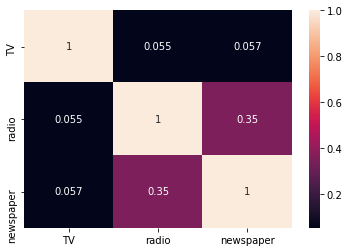

In [14]:
# correlation matrix visualized
sns.heatmap(df[["TV", "radio", "newspaper"]].corr(), annot=True)
plt.show()

---

**Is there relationship between response and predictors?**

simple linear regression - we were testing $\beta_{1}$ = 0 $\rightarrow$ t-statistic $\rightarrow$ t-distribution $\rightarrow$ p-value <br>
multiple linear regression - we are testing $\beta_{1}$ = $\beta_{2}$ = ... = $\beta_{p}$ = 0 $\rightarrow$ F-statistic $\rightarrow$ F-distribution $\rightarrow$ p-value (Prob F-statistic)<br>

- p-value for F-statistic is essentially 0 $\rightarrow$ at least one media is associated with increased sales
- note: using individual t-statistics and their p-values for this decision can be tricky if number of predictors is not small, F-statistic is safe regarding this (it adjusts to number of predictors)

---

**Deciding important predictors**

- try all models - calculate useful statistic, e.g. adjusted $R^{2}$ (version of $R^{2}$ adjusted for number of features) - viable only for small number of features as number of models go as $2^{p}$
- forward propagation - start with model containing just intercept and then add one feature in each iteration, in each iteration choose feature for which new model yields lowest residuals, until some stop criterion is satisfied
- mixed selection - proceed with forward propagation, if for some variable in the current model p-value is larger than some threshold, we remove that variable and continue

In [15]:
# TV - model

model = ols("sales ~ TV", data=df)
result = model.fit()

print("R squared: " + str(result.rsquared))
# print("R squared adjsuted: " + str(result.rsquared_adj))

R squared: 0.611875050850071


In [16]:
# TV, radio - model

model = ols("sales ~ TV + radio", data=df)
result = model.fit()

print("R squared: " + str(result.rsquared))
# print("R squared adjsuted: " + str(result.rsquared_adj))

R squared: 0.8971942610828956


In [17]:
# TV, radio, newspaper - model

model = ols("sales ~ TV + radio + newspaper", data=df)
result = model.fit()

print("R squared: " + str(result.rsquared))
# print("R squared adjsuted: " + str(result.rsquared_adj))

R squared: 0.8972106381789522


- very small gain in $R^{2}$ adding newspaper variable to the model $\rightarrow$ this variable should be ommited 
- if not discarded - possibility of overfitting on unseen data

In [18]:
# multiple regression - all relevant media

# create Ordinary Least Square model
model = ols("sales ~ TV + radio", data=df)

# fit model to data
result = model.fit()

# model overview
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 01 Dec 2020   Prob (F-statistic):           4.83e-98
Time:                        14:14:43   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

**Prediction**

In [19]:
# calculate prediction for the case TV = 100 000 eur, radio = 20 000 eur

result.predict(exog={"TV": 100, "radio": 20})

0    11.256466
dtype: float64

- But this prediction is just the prediction of the least squares plane, i.e. "mean" value. It would be more helpful to have prediction in terms of confidence & prediction intervals.
- Note - "mean" value: here, we are predicting the mean value of a sample, not a next single observation; e.g. we are measuring sales in large number of cities and quantifying what would be observed as the mean of this sample.
- Note - Confidence interval: quantifies uncertainty surrounding the mean; relates to reducible error
- Note - Prediction interval: quantifies uncretainty for a single observation; relates to both reducible and irreducible error
- Note - Reducible error: error that can be minimized by using better stats methods, adding more observations (found regression plane vs. population regresssion plane)
- Note - Irreducible error: error that can be never eradicated, coming from all effects we did not take into consideration - not measure

In [20]:
# calculate confidence & prediction intervals for the case TV = 100000 eur, radio = 20000 eur
result.get_prediction(exog={"TV": 100, "radio": 20}).summary_frame(alpha=0.05)

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  11.256466  0.137526      10.985254      11.527677      7.929616   

   obs_ci_upper  
0     14.583316

- given that 100,000 eur is spend on TV and 20,000 eur is spend on radio advertising in each city, **the 95% confidence interval is [10 985, 11 528] -> this quantifies uncertainity of the average sales over a large number of cities**, i.e. if we collect a larger number of data sets like the one used, and we construct a confidence interval for the average sales on the basis of each data set (given 100,000 eur is spend on TV and 20,000 eur is spend on radio advertising), then 95% of these confidence intervals will contain the true value value of average value of sales
- given that 100,000 eur is spend on TV and 20,000 eur is spend on radio advertising in a given city, **the 95% prediction interval is [7 930, 14 583] -> this quantifies uncertainity of sales in a particular city**

<h3> 5. Specialities </h3>

<h4> Qualitative predictors </h4>

In [21]:
# load credit dataset
credit_df = pd.read_csv("data/credit.csv")

In [22]:
# inspect the dataset
credit_df.head(10)

Unnamed: 0   Income  Limit  Rating  Cards  Age  Education  Gender Student  \
0           1   14.891   3606     283      2   34         11    Male      No   
1           2  106.025   6645     483      3   82         15  Female     Yes   
2           3  104.593   7075     514      4   71         11    Male      No   
3           4  148.924   9504     681      3   36         11  Female      No   
4           5   55.882   4897     357      2   68         16    Male      No   
5           6   80.180   8047     569      4   77         10    Male      No   
6           7   20.996   3388     259      2   37         12  Female      No   
7           8   71.408   7114     512      2   87          9    Male      No   
8           9   15.125   3300     266      5   66         13  Female      No   
9          10   71.061   6819     491      3   41         19  Female     Yes   

  Married         Ethnicity  Balance  
0     Yes         Caucasian      333  
1     Yes             Asian      903  
2      No             Asian      580  
3      No             Asian      964  
4     Yes         Caucasian      331  
5      No         Caucasian     1151  
6      No  African American      203  
7      No             Asian      872  
8      No         Caucasian      279  
9     Yes  African American     1350

In [23]:
# inspect the dataset
credit_df.describe()

Unnamed: 0      Income         Limit      Rating       Cards  \
count  400.000000  400.000000    400.000000  400.000000  400.000000   
mean   200.500000   45.218885   4735.600000  354.940000    2.957500   
std    115.614301   35.244273   2308.198848  154.724143    1.371275   
min      1.000000   10.354000    855.000000   93.000000    1.000000   
25%    100.750000   21.007250   3088.000000  247.250000    2.000000   
50%    200.500000   33.115500   4622.500000  344.000000    3.000000   
75%    300.250000   57.470750   5872.750000  437.250000    4.000000   
max    400.000000  186.634000  13913.000000  982.000000    9.000000   

              Age   Education      Balance  
count  400.000000  400.000000   400.000000  
mean    55.667500   13.450000   520.015000  
std     17.249807    3.125207   459.758877  
min     23.000000    5.000000     0.000000  
25%     41.750000   11.000000    68.750000  
50%     56.000000   14.000000   459.500000  
75%     70.000000   16.000000   863.000000  
max     98.000000   20.000000  1999.000000

In [24]:
# Create pair-wise scatter plots, while dropping useless column
# sns.pairplot(credit_df.drop("Unnamed: 0", axis=1))

- income (in thousands of $$), limit (credit limit), rating (credit rating), age, cards (numer of credit cards), education (years of education) are **quantitative - numerical predictors**
- gender, student (student status), married (marrital status), ethnicity (Causasian, African American, Asian) are **qualitative - categorical predictors**
- balance (credit card account balance) - **quantitative - numerical predictant (dependent variable)**

In [25]:
regress_df = credit_df["Balance"]
regress_df = pd.concat([regress_df, pd.get_dummies(credit_df["Gender"], prefix="Gender")], axis=1)
regress_df.head()

Balance  Gender_Female  Gender_Male
0      333              0            1
1      903              1            0
2      580              0            1
3      964              1            0
4      331              0            1

In [26]:
# simple linear regression of balance onto gender

# create Ordinary Least Square model
model = ols("Balance ~ Gender_Female", data=regress_df)

# fit model to data
result = model.fit()

# model overview
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Tue, 01 Dec 2020   Prob (F-statistic):              0.669
Time:                        14:14:43   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       509.8031     33.128     15.389      0.000     444.675     574.931
Gender_Female    19.7331     46.051      0.429      0.669     -70.801     110.267
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Our model: $y_{i} =\beta_{0}+\beta_{1}x_{i}$, where $x_{i}$ is 0 for males and 1 for females
- the average credit card debt for males is estimated to be \\$509.80, whereas females are estimated to carry \\$19.73 additonal debt
- however, the p-value for dummy variable is very large -> there is no statistical evidence of a difference between males and females

In [27]:
# EXERCISE

# Of course, we get the same result if choose Gender_Male column instead of Gender_Female, though the interpretation of the slope is different.
# Try it yourself.

# create Ordinary Least Square model


# fit model to data


# model overview


# ... interpret the model

In [28]:
# what if we have more than two values for qualitative variable

regress_df = credit_df["Balance"]
regress_df = pd.concat([regress_df, pd.get_dummies(credit_df["Ethnicity"], prefix="Ethnicity")], axis=1)
regress_df.head()

Balance  Ethnicity_African American  Ethnicity_Asian  Ethnicity_Caucasian
0      333                           0                0                    1
1      903                           0                1                    0
2      580                           0                1                    0
3      964                           0                1                    0
4      331                           0                0                    1

In [29]:
# multiple linear regression of balance onto entnicity; multiple as there are > 2 ethnicities

# create Ordinary Least Square model
model = ols("Balance ~ Ethnicity_Asian + Ethnicity_Caucasian", data=regress_df)

# fit model to data
result = model.fit()

# model overview
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Tue, 01 Dec 2020   Prob (F-statistic):              0.957
Time:                        14:14:44   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             531.0000     46.319     11.464      0.000     439.939     622.061
Ethnicity_Asian       -18.6863     65.021     -0.287      0.774    -146.515     109.142
Ethnicity_Caucasian   -12.5025     56.681     -0.221      0.826    -123.935      98.930
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Our model: $y_{i}=\beta_{0}+\beta_{1}x_{i1}+\beta_{2}x_{i2}$, where $x_{i1}$ is 1 for Asian, 0 for not Asian and $x_{i2}$ is 1 for Caucasian, 0 for not Caucasian
- the variable Ethnicity_African_American is baseline in this case
- Note: we have always $k$-1 coefficients, where $k$ is number of cathegories
- model points to Asians having lowest debt, followed by Caucasians and African Americans, but again and importantly, the result is not statistically significant
- statistical insignificance can be seen from F-test statistic values - the fact this has p-value of about 0.96
- Note: it is better to look at F-test p-values rather than p-values associated with individual coefficients as the former is independet on the chosen variable coding and the latter is not

---

<h4> Synergies </h4>

In [30]:
# multiple regression - all relevant media in advertising example

# create Ordinary Least Square model
model = ols("sales ~ TV + radio", data=df)

# fit model to data
result = model.fit()

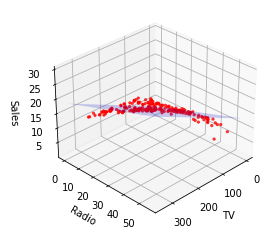

In [31]:
# plot data and regression plane
# Do data lie close to the plane?

# create figure for plots
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create mesh for regression surface
x_surf = np.arange(0, 350, 20)
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
coefs = result.params[1:]
intercept = result.params[0]
z_surf = x_surf*coefs[0] + y_surf*coefs[1] + intercept

# surface plot of regression plane
ax.plot_surface(x_surf, 
                y_surf,
                z_surf,
                rstride=1,
                cstride=1,
                color='blue',
                alpha = 0.2)

# scatter plot of the data
ax.scatter(df["TV"], df["radio"], df["sales"],
           c='red',
           marker='.',
           alpha=0.7)

# set labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

# orientation of the 3D view
ax.view_init(30, 45)

- synergies/interactions - returning to advertising example, what if the amount of money spend on radio advertising actually increases the effectiveness of TV advertising, so that the slope for TV term increases as radio increases (or vice-versa)
- we can model such interaction in the advertising data as follows:

<center>
    sales = $\beta_{0}+\beta_{1}\times$ TV + $\beta_{2}\times$ radio + $\beta_{3}\times$ (radio $\times$ TV) + $\epsilon$
</center>
</br>
<center>
    sales = $\beta_{0}$ + ($\beta_{1}+\beta_{3}\times$ radio) $\times$ TV + $\beta_{2}\times$ radio + $\epsilon$
</center>

In [32]:
# multiple linear regression for the advertising data with radio-tv interaction term

# TV-radio product feature
df["radio_tv"] = df["TV"]*df["radio"]

# create Ordinary Least Square model
model = ols("sales ~ TV + radio + radio_tv", data=df)

# fit model to data
result = model.fit()

# model overview
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Tue, 01 Dec 2020   Prob (F-statistic):          6.68e-146
Time:                        14:14:44   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
radio          0.0289      0.009      3.241      0.001       0.011       0.046
radio_tv       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Our current model: sales $\approx\beta_{0}+\beta_{1}\times$ TV + $\beta_{2}\times$ radio + $\beta_{3}\times$ (radio $\times$ TV) 
- p-value for interaction term is tiny, morever $R^{2}$ is 96.8% compared to 89.7% without interaction term => this interaction effect is important and explains 69%=(96.8-89.7)/(100-89.7) of the remained variability in the data
- ($\hat{\beta}_{1}+\hat{\beta}_{3}\times$ radio) $\times$ 1000 = 19.1+1.1 $\times$ radio for each unit of TV
- ($\hat{\beta}_{2}+\hat{\beta}_{3}\times$ TV) $\times$ 1000 = 29+1.1 $\times$ TV for each unit of radio

---

<h4> Non-linear relationships </h4>

- one very simple approach is *polynomial regression*

In [33]:
# read auto data into dataframe
df_auto = pd.read_csv("data/auto.csv").drop(["Unnamed: 9"], axis=1)

# show head and tail of the datafame
df_auto.head(-5)

mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0    18.0          8         307.0      130.0    3504          12.0    70   
1    15.0          8         350.0      165.0    3693          11.5    70   
2    18.0          8         318.0      150.0    3436          11.0    70   
3    16.0          8         304.0      150.0    3433          12.0    70   
4    17.0          8         302.0      140.0    3449          10.5    70   
..    ...        ...           ...        ...     ...           ...   ...   
387  26.0          4         156.0      92.00    2585          14.5    82   
388  22.0          6         232.0      112.0    2835          14.7    82   
389  32.0          4         144.0      96.00    2665          13.9    82   
390  36.0          4         135.0      84.00    2370          13.0    82   
391  27.0          4         151.0      90.00    2950          17.3    82   

     origin                        name  
0         1   chevrolet chevelle malibu  
1         1           buick skylark 320  
2         1          plymouth satellite  
3         1               amc rebel sst  
4         1                 ford torino  
..      ...                         ...  
387       1  chrysler lebaron medallion  
388       1              ford granada l  
389       3            toyota celica gt  
390       1           dodge charger 2.2  
391       1            chevrolet camaro  

[392 rows x 9 columns]

miles per galon to litres/100 km: 1 mpg = 235.214583 litres / (100 kilometers)

In [34]:
# just for curiosity adding consumption in litres / 100 km as another column
df_auto["lp100km"] = 235.214583/df_auto["mpg"]

In [35]:
# show head of the data with new column, sort from newest to oldest cars in the dataframe
df_auto.sort_values("year", axis=0, ascending=False).head()

mpg  cylinders  displacement horsepower  weight  acceleration  year  \
396  31.0          4         119.0      82.00    2720          19.4    82   
381  34.0          4         108.0      70.00    2245          16.9    82   
367  28.0          4         112.0      88.00    2605          19.6    82   
368  27.0          4         112.0      88.00    2640          18.6    82   
369  34.0          4         112.0      88.00    2395          18.0    82   

     origin                       name   lp100km  
396       1                 chevy s-10  7.587567  
381       3             toyota corolla  6.918076  
367       1         chevrolet cavalier  8.400521  
368       1   chevrolet cavalier wagon  8.711651  
369       1  chevrolet cavalier 2-door  6.918076

In [36]:
# datatypes of columns - horsepower is interpreted as object (this is because missing values are "?"), this would be problem
df_auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
lp100km         float64
dtype: object

In [37]:
# looking at unique values in this column; horsepower is interpreted as object because of missing values - "?", this would be problem
df_auto["horsepower"].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [38]:
# replace "?" -> nans: np.nan
# drop rows with nans in columns horsepower and mpg
# cast as float
df_auto = df_auto[["horsepower", "mpg"]].replace({'?': np.nan}).dropna(subset=["horsepower", "mpg"]).astype(float)

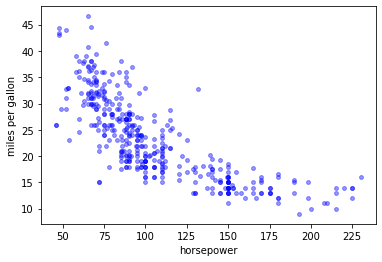

In [39]:
# plot scatter plot of the data
plt.scatter(df_auto["horsepower"], df_auto["mpg"], color="b", marker="o", s=15, alpha=0.4)

# label axes
_ = plt.xlabel("horsepower")
_ = plt.ylabel("miles per gallon")

In [40]:
# simple linear regression for the auto data

# create Ordinary Least Square model
model = ols("mpg ~ horsepower", data=df_auto)

# fit model to data
result_lin = model.fit()

# model overview
result_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 01 Dec 2020   Prob (F-statistic):           7.03e-81
Time:                        14:14:44   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# fitted parameters of the regression
result_lin.params

Intercept     39.935861
horsepower    -0.157845
dtype: float64

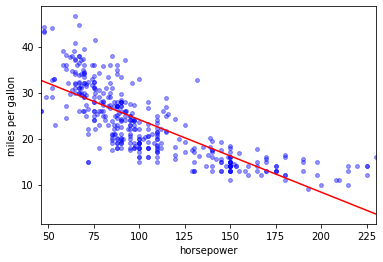

In [42]:
# easy way how to plot regression line
fig = sm.graphics.abline_plot(model_results=result_lin, color="r")
ax = fig.axes[0]
ax.scatter(df_auto["horsepower"], df_auto["mpg"], marker="o", s=15, alpha=0.4, color="b")

# axes labels
_ = plt.xlabel("horsepower")
_ = plt.ylabel("miles per gallon")

- Let's try model: mpg = $\beta_{0}+\beta_{1}\times$ horsepower +$\beta_{2}\times$ horsepower$^{2}$ 
- this is still linear model with $X_{1}=$  horsepower and $X_{2}=$ horsepower$^{2}$

In [43]:
# multiple linear regression for the auto data

# create squared horsepower feature
df_auto["horsepower2"] = df_auto["horsepower"]*df_auto["horsepower"]

# create Ordinary Least Square model
model = ols("mpg ~ horsepower + horsepower2", data=df_auto)

# fit model to data
result_quad = model.fit()

# model overview
result_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Tue, 01 Dec 2020   Prob (F-statistic):           5.40e-99
Time:                        14:14:44   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      56.9001      1.800     31.604      0.000      53.360      60.440
horsepower     -0.4662      0.031    -14.978      0.000      -0.527      -0.405
horsepower2     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# fitted parameters of the regression
result_quad.params

Intercept      56.900100
horsepower     -0.466190
horsepower2     0.001231
dtype: float64

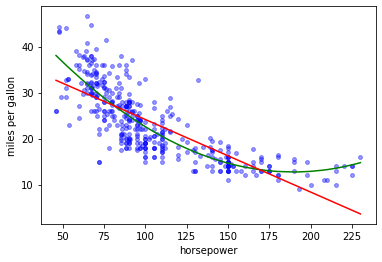

In [45]:
# plotting the data
plt.scatter(df_auto["horsepower"], df_auto["mpg"], color="b", marker="o", s=15, alpha=0.4)

# plotting the regression line - quadratic in horsepower
coefs = result_quad.params[1:]
intercept = result_quad.params[0]
horsepower_sorted = df_auto["horsepower"].sort_values()
y_pred = intercept + coefs["horsepower"]*horsepower_sorted + coefs["horsepower2"]*horsepower_sorted*horsepower_sorted
plt.plot(horsepower_sorted, y_pred, color="g") 

# plotting the regression line - linear in horsepower
slope = result_lin.params["horsepower"]
intercept = result_lin.params["Intercept"]
horsepower_sorted = df_auto["horsepower"].sort_values()
y_pred = intercept + slope*horsepower_sorted
plt.plot(horsepower_sorted, y_pred, color="r") 

# axes labels
_ = plt.xlabel("horsepower")
_ = plt.ylabel("miles per gallon")

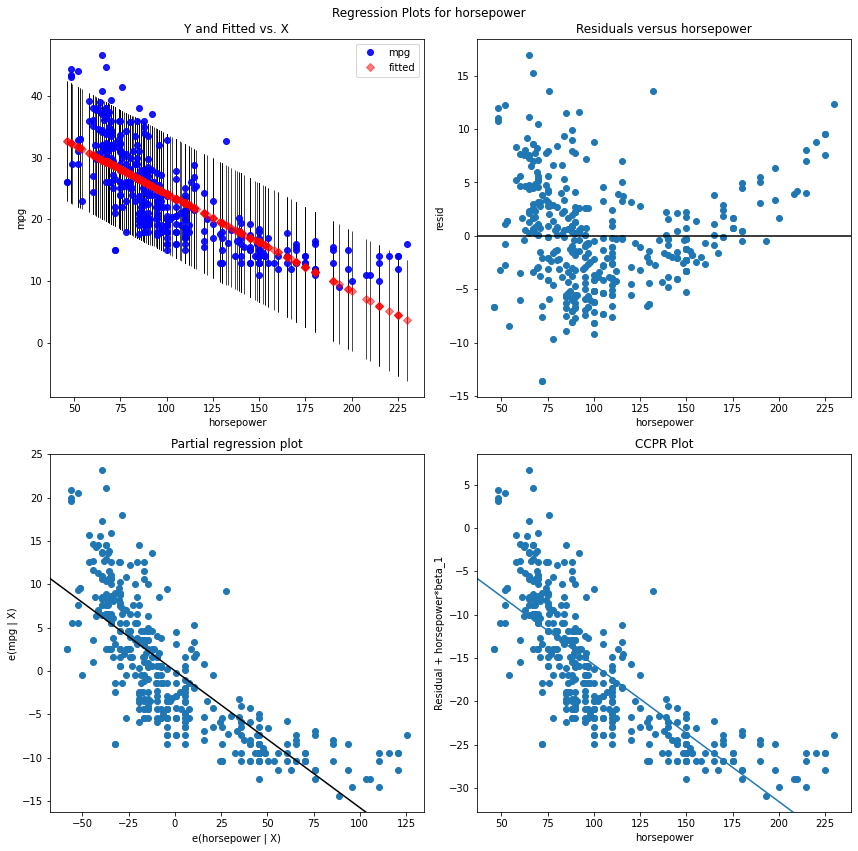

In [46]:
# using sm.graphics to plot residuals as function of a feature
fig = plt.figure(figsize=(12, 12))
fig = sm.graphics.plot_regress_exog(result_lin, "horsepower", fig=fig)
fig.tight_layout(pad=1.0)

- there is a strong pattern looking at residuals vs. predictor in the horsepower linear model => such model is not a good approximation

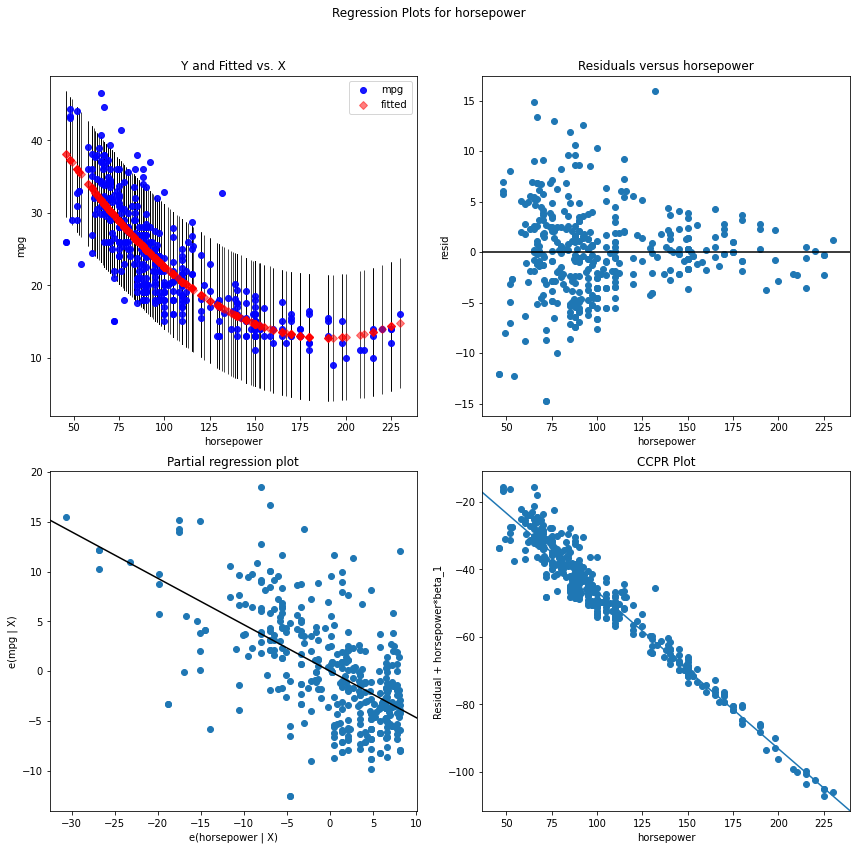

In [47]:
# using sm.graphics to plot residuals as function of a feature
fig = plt.figure(figsize=(12, 12))
sm.graphics.plot_regress_exog(result_quad, "horsepower", fig=fig)
plt.show()

- tl;dr: if residual plot indicates that there is non linear association in the data - try transformations of features, like $\log(X)$, $\sqrt X$, $X^{2}$, ...

- funnel shape in residuals indicate violation of linear model assumption of constant variance in error terms
- we can use a little trick - log tranform response variable - to improve the fit

In [48]:
# multiple linear regression for the auto data - log transformed response

# create squared horsepower feature
df_auto["log_mpg"] = np.log(df_auto["mpg"])
df_auto["horsepower2"] = df_auto["horsepower"]*df_auto["horsepower"]

# create Ordinary Least Square model
model = ols("log_mpg ~ horsepower + horsepower2", data=df_auto)

# fit model to data
result_quad_log = model.fit()

# model overview
result_quad_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_mpg   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     532.2
Date:                Tue, 01 Dec 2020   Prob (F-statistic):          4.54e-112
Time:                        14:14:46   Log-Likelihood:                 125.48
No. Observations:                 392   AIC:                            -245.0
Df Residuals:                     389   BIC:                            -233.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.4022      0.073     60.639      0.000       4.260       4.545
horsepower     -0.0171      0.001    -13.632      0.000      -0.020      -0.015
horsepower2  3.901e-05   4.92e-06      7.925      0.000    2.93e-05    4.87e-05
==============================================================================
Omnibus:                        9.051   Durbin-Watson:                   1.092
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               13.714
Skew:                          -0.142   Prob(JB):                      0.00105
Kurtosis:                       3.871   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

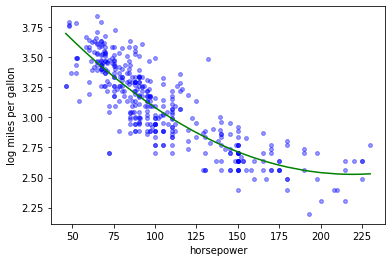

In [49]:
# plotting the data
plt.scatter(df_auto["horsepower"], df_auto["log_mpg"], color="b", marker="o", s=15, alpha=0.4)

# plotting the regression line - quadratic in predictor horsepower, log in dependent variable mpg
coefs = result_quad_log.params[1:]
intercept = result_quad_log.params[0]
horsepower_sorted = df_auto["horsepower"].sort_values()
y_pred = intercept + coefs["horsepower"]*horsepower_sorted + coefs["horsepower2"]*horsepower_sorted*horsepower_sorted
plt.plot(horsepower_sorted, y_pred, color="g") 

# axes labels
_ = plt.xlabel("horsepower")
_ = plt.ylabel("log miles per gallon")

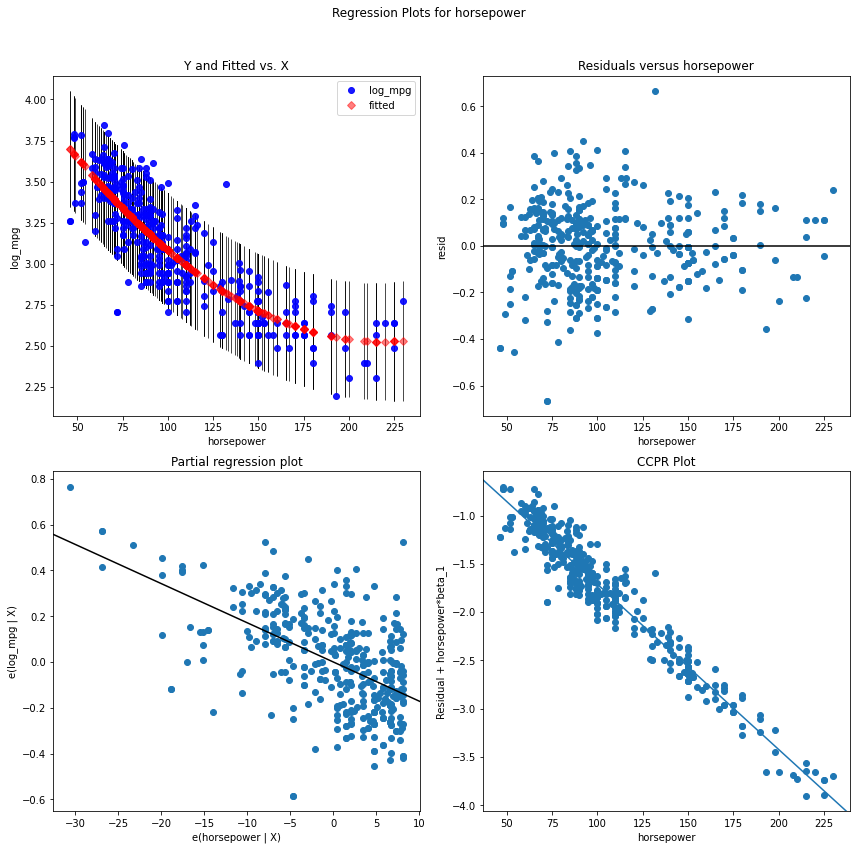

In [50]:
# using sm.graphics to plot residuals as function of a feature
fig = plt.figure(figsize=(12, 12))
sm.graphics.plot_regress_exog(result_quad_log, "horsepower", fig=fig)
plt.show()

- residuals in such model behave, and $R^{2}$ is significantly higher

- another potential improvement in $R^{2}$ would come from filtering out outliers...

---

<h3> 6. The marketing use case - summary </h3>

A few important questions that we might seek to address:
1. Is there a relationship between advertising budget and sales?
2. How strong is the relationship between advertising budget and sales?
3. Which media contribute to sales?
4. How accurately can we estimate the effect of each medium on sales?
5. How accurately can we predict future sales?
6. Is the relationship linear?
7. Is there synergy (interaction) among advertising media?

In [60]:
# multiple regression - all media

# create Ordinary Least Square model
model = ols("sales ~ TV + radio + newspaper", data=df)

# fit model to data
result = model.fit()

# model overview
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 01 Dec 2020   Prob (F-statistic):           1.58e-96
Time:                        14:15:31   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

**1. Is there a relationship between advertising budget and sales?**

- we tried multiple regression model of sales onto TV, radio, and newspaper
- we rejected null hypothesis $H_{0}$: $\beta_{TV}=\beta_{radio}=\beta_{newspaper}=0$ by calculating p-value corresponding to F-statistic of this model as p-value was very small
- this is clear evidence of relationship between advertising and sales

**2. How strong is the relationship between advertising budget and sales?**

- $R^{2}$ statistic value shows that in this simple model the predictors explain about 90% of variability in the response, i.e. 90% of variance in sales

**3. Which media contribute to sales?**

- p-values associated with TV and radio are very small, while the one associated with newspaper is not
- also adding newspaper feature to the model with radio and TV features improves $R^{2}$ only by tiny amount
- thus TV and radio contribute to the sales

In [61]:
# multiple regression - all relevant media

# create Ordinary Least Square model
model = ols("sales ~ TV + radio", data=df)

# fit model to data
result = model.fit()

# model overview
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 01 Dec 2020   Prob (F-statistic):           4.83e-98
Time:                        14:15:33   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**4. How accurately can we estimate the effect of each medium on sales?**

- we can do this by calculating confidence intervals
- 95% confidence interval for TV: (0.043, 0.049)
- 95% confidence interval for radio: (0.172, 0.206)
- 95% confidence interval for newspaper: (-0.013, 0.011)
- for TV and radio, confidence intervals are narrow and far from 0 => these media are related to the sales
- for newspaper, the confidence interval is wide and centered around zero => this predictor is not statistically significant given the values of TV and radio

**5. How accurately can we predict future sales?**

- we can predict individual response $Y=f(X)+\epsilon$ or average response $f(X)$ using prediction and confidence intervals

In [62]:
result.get_prediction(exog={"TV": 100, "radio": 20}).summary_frame(alpha=0.05)

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  11.256466  0.137526      10.985254      11.527677      7.929616   

   obs_ci_upper  
0     14.583316

**6. Is the relationship linear?**

- looking at residual vs. predictor plots and also 3D plot showing data and the regression plane - there is definitelly some non-linearity

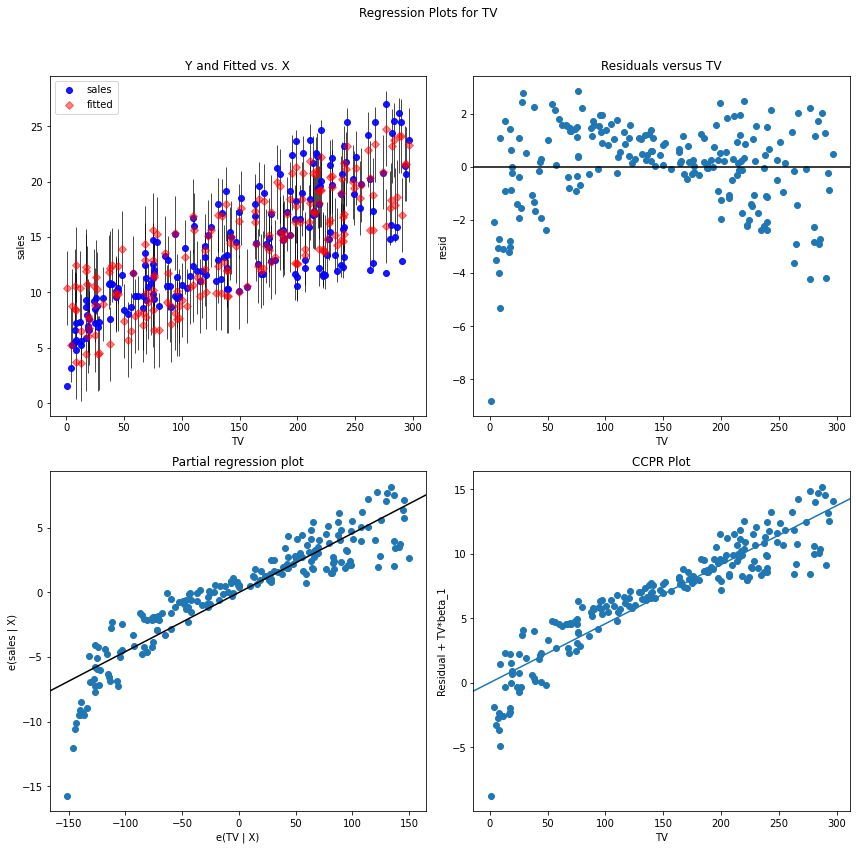

In [63]:
# using sm.graphics to plot residuals as function of a feature
fig = plt.figure(figsize=(12, 12))
sm.graphics.plot_regress_exog(result, "TV", fig=fig)
plt.show()

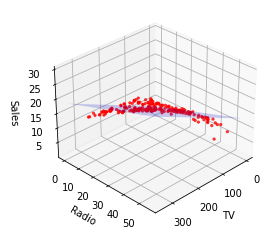

In [64]:
# plot data and regression plane
# Do data lie close to the plane?

# create figure for plots
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create mesh for regression surface
x_surf = np.arange(0, 350, 20)
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
coefs = result.params[1:]
intercept = result.params[0]
z_surf = x_surf*coefs[0] + y_surf*coefs[1] + intercept

# surface plot of regression plane
ax.plot_surface(x_surf, y_surf,
                z_surf,
                rstride=1,
                cstride=1,
                color='blue',
                alpha = 0.2)

# scatter plot of the data
ax.scatter(df["TV"], df["radio"], df["sales"],
           c='red',
           marker='.',
           alpha=0.7)

# set labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

# orientation of 3D view
ax.view_init(30, 45)

**7. Is there synergy (interaction) among advertising media?**

- we tried also model incorporating synergy between TV and radio and showed that inclusion of such interaction term improves the model in terms of $R^{2}$ and that the p-value associated with this term is small, concluding that this effect is statistically significant

In [65]:
# multiple linear regression for the advertising data with radio-tv interaction term

# TV-radio product feature
df["radio_tv"] = df["TV"]*df["radio"]

# create Ordinary Least Square model
model = ols("sales ~ TV + radio + radio_tv", data=df)

# fit model to data
result = model.fit()

# model overview
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Tue, 01 Dec 2020   Prob (F-statistic):          6.68e-146
Time:                        14:15:49   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
radio          0.0289      0.009      3.241      0.001       0.011       0.046
radio_tv       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

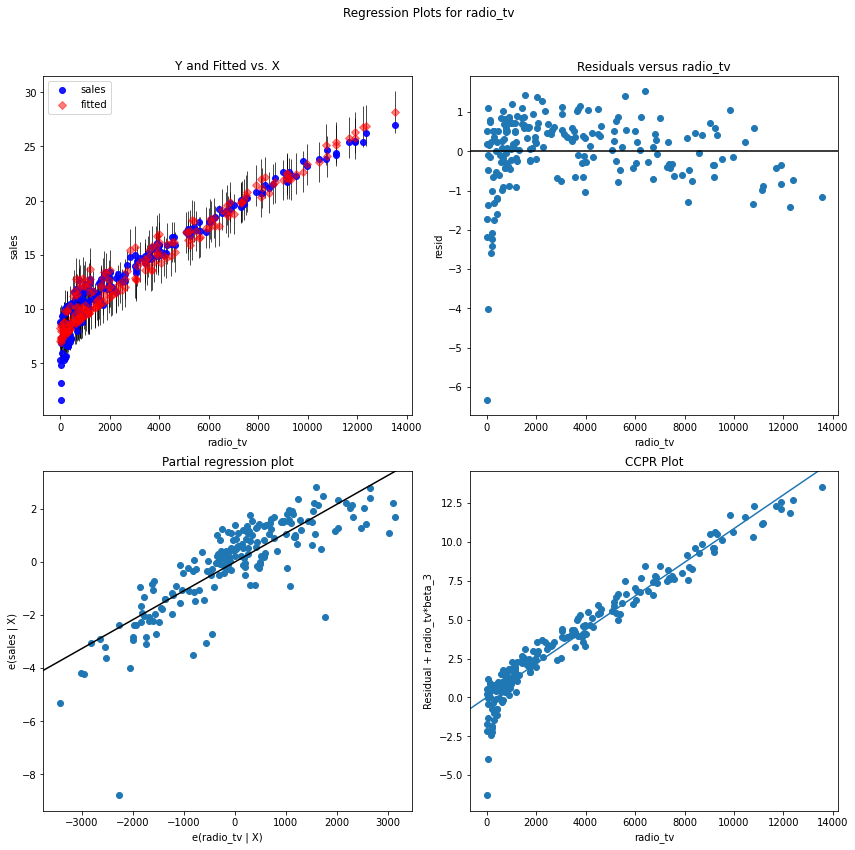

In [66]:
# using sm.graphics to plot residuals as function of a feature
fig = plt.figure(figsize=(12, 12))
sm.graphics.plot_regress_exog(result, "radio_tv", fig=fig)
plt.show()

The advertising problem and data are adopted from the book An Introduction to Statistical Learning (James et. al 2017).